# MALIGNANT COMMENTS CLASSIFICATION Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_multilabel_classification



import warnings
warnings.filterwarnings("ignore")


## Loading data

In [2]:
df_tr=pd.read_csv("train_m.csv")
df_tr

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
df_tr.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [4]:
print('train shape is ',df_tr.shape)

train shape is  (159571, 8)


In [5]:
df_ts=pd.read_csv("test_m1.csv")
df_ts

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [6]:
print('test shape is ',df_ts.shape)

test shape is  (153164, 2)


In [7]:
print('train info',df_tr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
train info None


In [8]:
print('test info',df_ts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
test info None


In [9]:
df_tr.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df_ts.describe()

,id,comment_text
count,153164,153164
unique,153164,153164
top,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
freq,1,1


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


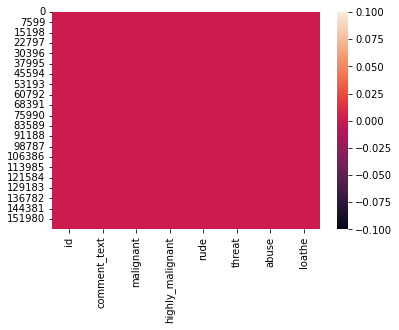

In [11]:
print(df_tr.isnull().sum())
print(sns.heatmap(df_tr.isnull()))

In [12]:
## checking correlation in datase
df_tr.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


AxesSubplot(0.125,0.125;0.62x0.755)


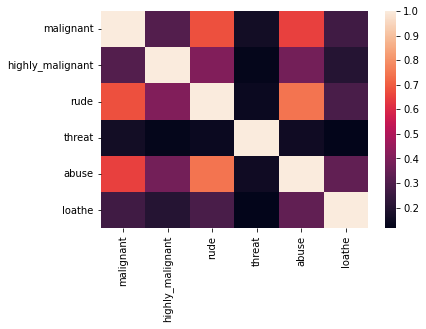

In [13]:
print(sns.heatmap(df_tr.corr()))

In [14]:
df_tr.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


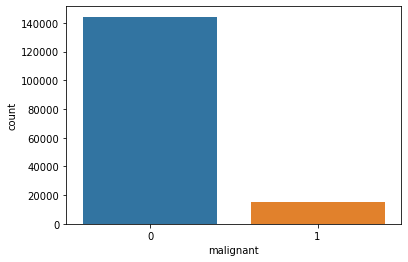

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


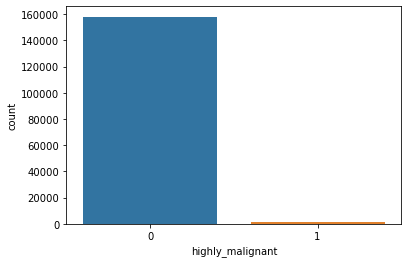

loathe


0    158166
1      1405
Name: loathe, dtype: int64


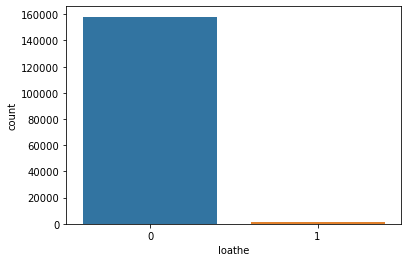

rude


0    151122
1      8449
Name: rude, dtype: int64


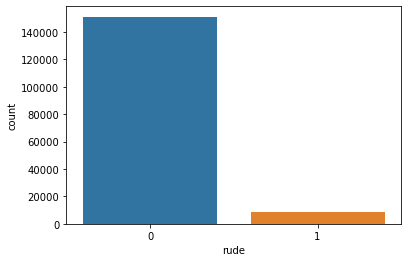

abuse


0    151694
1      7877
Name: abuse, dtype: int64


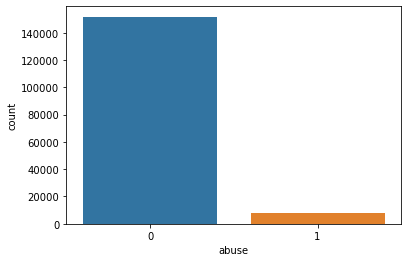

threat


0    159093
1       478
Name: threat, dtype: int64


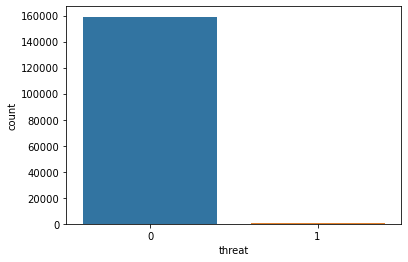

In [15]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(df_tr[i].value_counts())
    sns.countplot(df_tr[i])
    plt.show()

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [17]:
df_tr['length'] = df_tr['comment_text'].str.len()
df_tr.head(2)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Convert all messages to lower case
df_tr['comment_text'] = df_tr['comment_text'].str.lower()

# Replace email addresses with 'email'
df_tr['comment_text'] = df_tr['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df_tr['comment_text'] = df_tr['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df_tr['comment_text'] = df_tr['comment_text'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df_tr['comment_text'] = df_tr['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
df_tr['comment_text'] = df_tr['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


df_tr['comment_text'] = df_tr['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df_tr['comment_text'] = df_tr['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))


lem=WordNetLemmatizer()
df_tr['comment_text'] = df_tr['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [21]:
df_tr['clean_length'] = df_tr.comment_text.str.len()
df_tr.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [22]:
# Total length removal
print ('Original Length', df_tr.length.sum())
print ('Clean Length', df_tr.clean_length.sum())

Original Length 62893130
Clean Length 43575187


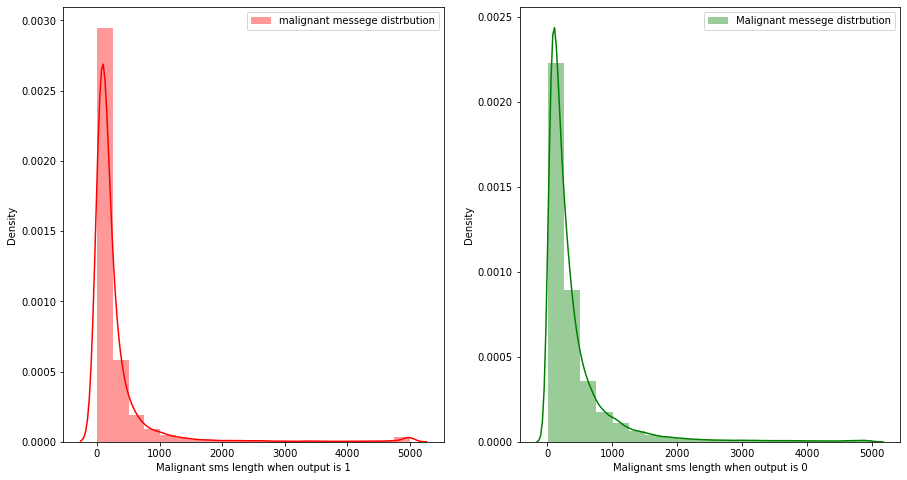

In [23]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_tr[df_tr['malignant']==1]['length'],bins=20,ax=ax[0],label='malignant messege distrbution',color='r')
ax[0].set_xlabel('Malignant sms length when output is 1')
ax[0].legend()

sns.distplot(df_tr[df_tr['malignant']==0]['length'],bins=20,ax=ax[1],label='Malignant messege distrbution',color='g')
ax[1].set_xlabel('Malignant sms length when output is 0')
ax[1].legend()

plt.show()

The above plot is for the original malignant comments

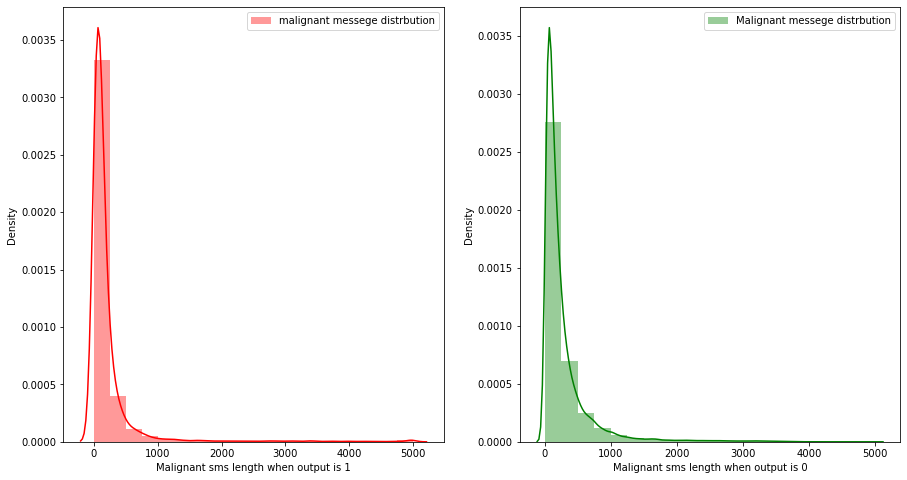

In [24]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_tr[df_tr['malignant']==1]['clean_length'],bins=20,ax=ax[0],label='malignant messege distrbution',color='r')
ax[0].set_xlabel('Malignant sms length when output is 1')
ax[0].legend()

sns.distplot(df_tr[df_tr['malignant']==0]['clean_length'],bins=20,ax=ax[1],label='Malignant messege distrbution',color='g')
ax[1].set_xlabel('Malignant sms length when output is 0')
ax[1].legend()

plt.show()

The above plot is for the clean malignant comments

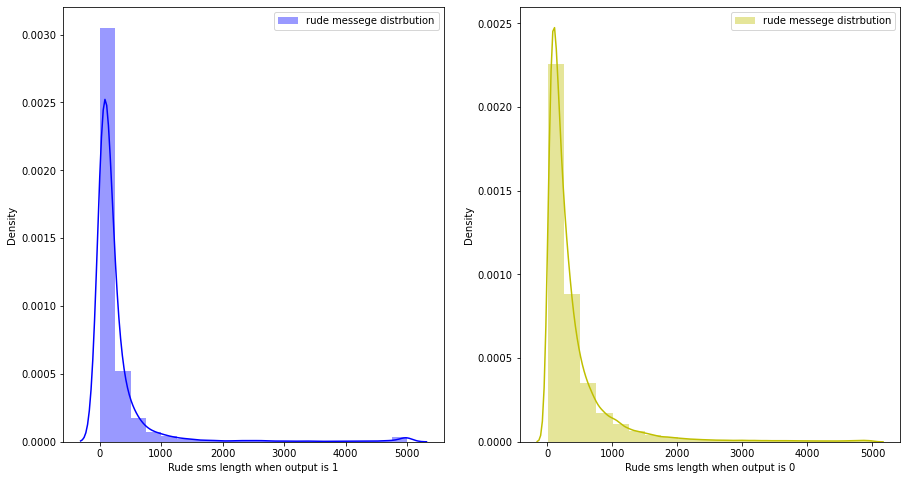

In [25]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_tr[df_tr['rude']==1]['length'],bins=20,ax=ax[0],label='rude messege distrbution',color='b')
ax[0].set_xlabel('Rude sms length when output is 1')
ax[0].legend()

sns.distplot(df_tr[df_tr['rude']==0]['length'],bins=20,ax=ax[1],label='rude messege distrbution',color='y')
ax[1].set_xlabel('Rude sms length when output is 0')
ax[1].legend()


The above plot is for the original rude comments

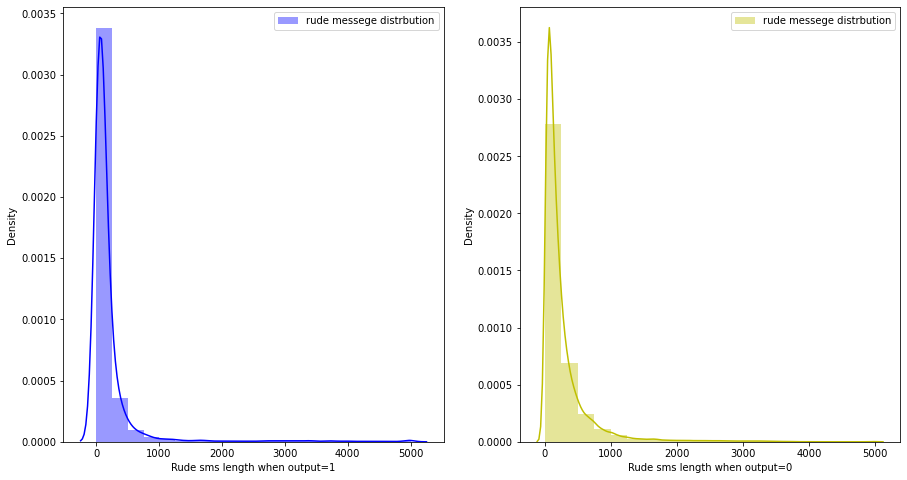

In [26]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_tr[df_tr['rude']==1]['clean_length'],bins=20,ax=ax[0],label='rude messege distrbution',color='b')
ax[0].set_xlabel('Rude sms length when output=1')
ax[0].legend()

sns.distplot(df_tr[df_tr['rude']==0]['clean_length'],bins=20,ax=ax[1],label='rude messege distrbution',color='y')
ax[1].set_xlabel('Rude sms length when output=0')
ax[1].legend()

plt.show()

The above plot is for the clean rude comments

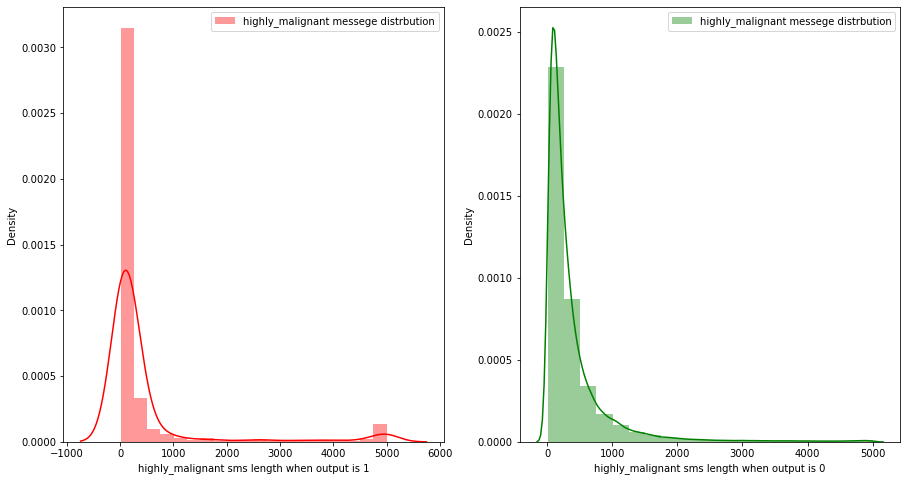

In [27]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_tr[df_tr['highly_malignant']==1]['length'],bins=20,ax=ax[0],label='highly_malignant messege distrbution',color='r')
ax[0].set_xlabel('highly_malignant sms length when output is 1')
ax[0].legend()

sns.distplot(df_tr[df_tr['highly_malignant']==0]['length'],bins=20,ax=ax[1],label='highly_malignant messege distrbution',color='g')
ax[1].set_xlabel('highly_malignant sms length when output is 0')
ax[1].legend()


The above plot is for the original highly malignant comments

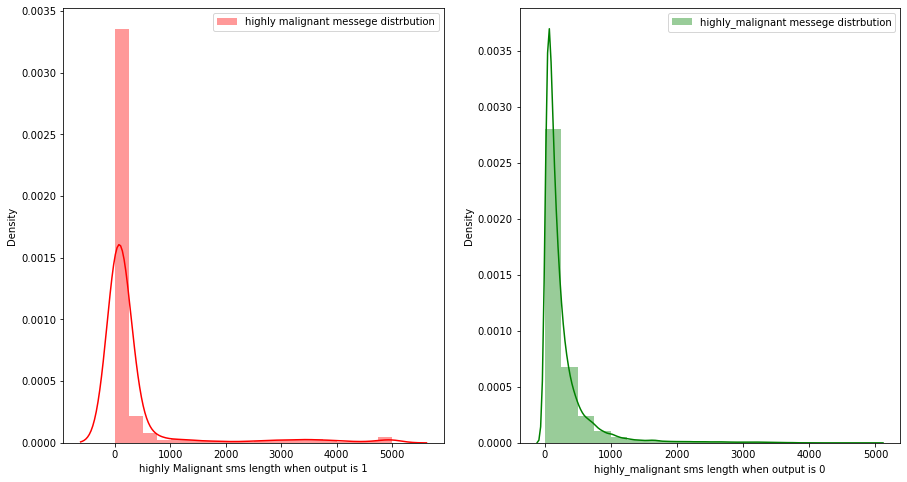

In [28]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_tr[df_tr['highly_malignant']==1]['clean_length'],bins=20,ax=ax[0],label='highly malignant messege distrbution',color='r')
ax[0].set_xlabel('highly Malignant sms length when output is 1')
ax[0].legend()

sns.distplot(df_tr[df_tr['highly_malignant']==0]['clean_length'],bins=20,ax=ax[1],label='highly_malignant messege distrbution',color='g')
ax[1].set_xlabel('highly_malignant sms length when output is 0')
ax[1].legend()
plt.show()

The above plot is for the clean highly malignant comments

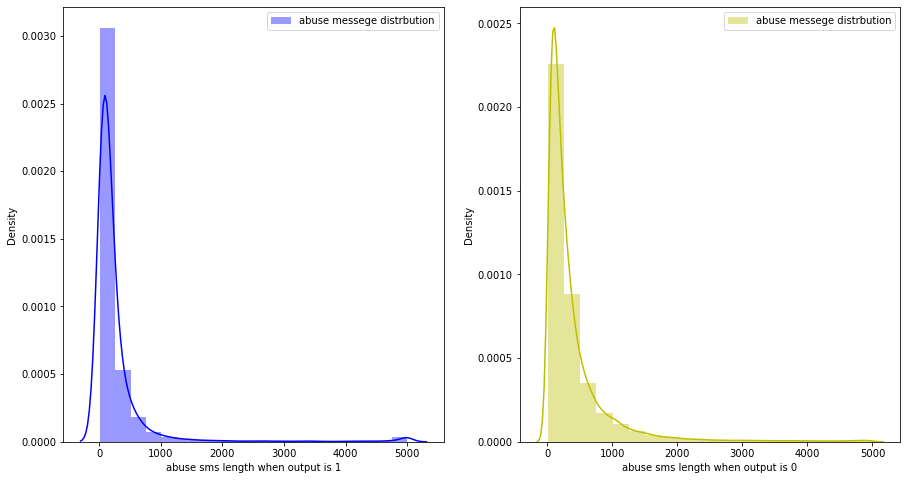

In [29]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_tr[df_tr['abuse']==1]['length'],bins=20,ax=ax[0],label='abuse messege distrbution',color='b')
ax[0].set_xlabel('abuse sms length when output is 1')
ax[0].legend()

sns.distplot(df_tr[df_tr['abuse']==0]['length'],bins=20,ax=ax[1],label='abuse messege distrbution',color='y')
ax[1].set_xlabel('abuse sms length when output is 0')
ax[1].legend()


The above plot is for the original abuse comments

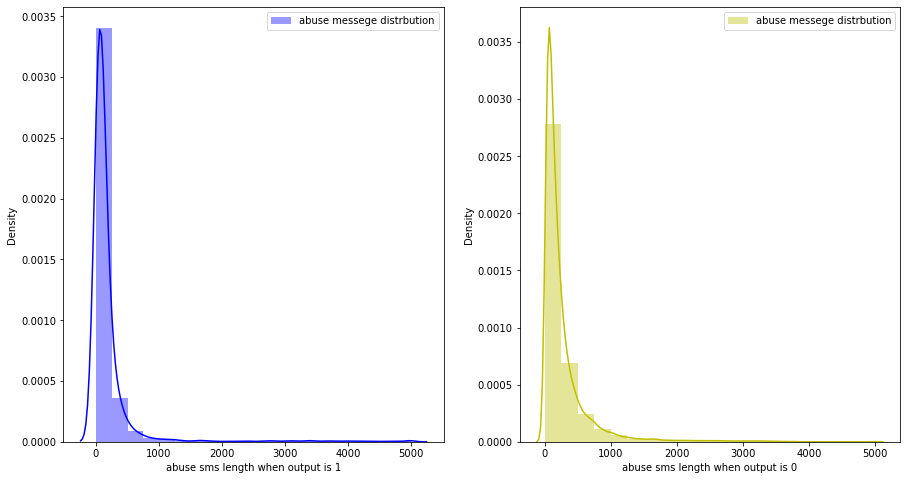

In [30]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df_tr[df_tr['abuse']==1]['clean_length'],bins=20,ax=ax[0],label='abuse messege distrbution',color='b')
ax[0].set_xlabel('abuse sms length when output is 1')
ax[0].legend()

sns.distplot(df_tr[df_tr['abuse']==0]['clean_length'],bins=20,ax=ax[1],label='abuse messege distrbution',color='y')
ax[1].set_xlabel('abuse sms length when output is 0')
ax[1].legend()
plt.show()

The above plot is for the clean abuse comments

In [31]:
#!pip install wordcloud

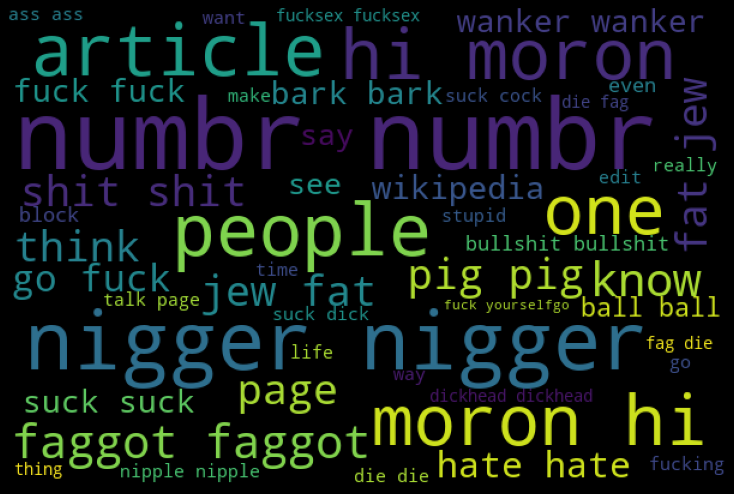

In [32]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df_tr['comment_text'][df_tr['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

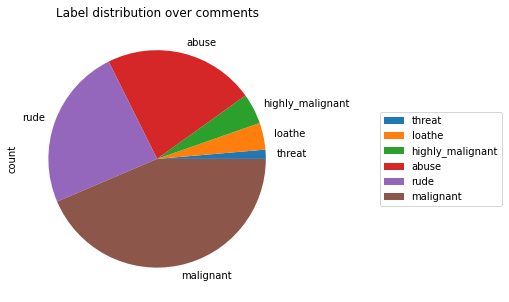

In [34]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = df_tr[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [35]:
target_data = df_tr[cols_target]

df_tr['bad'] =df_tr[cols_target].sum(axis =1)
print(df_tr['bad'].value_counts())
df_tr['bad'] = df_tr['bad'] > 0 
df_tr['bad'] = df_tr['bad'].astype(int)
print(df_tr['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


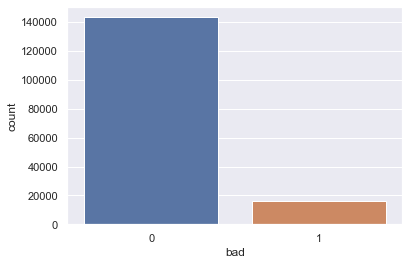

In [36]:
sns.set()
sns.countplot(x="bad" , data = df_tr)
plt.show()

In [37]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df_tr['comment_text'])
x = features

In [38]:
df_tr.shape

(159571, 11)

In [39]:
df_tr.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length,bad
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180,0
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111,0
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149,0
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397,0
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47,0


In [40]:
df_ts.shape

(153164, 2)

In [41]:
y=df_tr['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [42]:
y_train.shape

(111699,)

In [43]:
y_test.shape

(47872,)

In [44]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9595520103134316
Test accuracy is 0.9552974598930482
[[42729   221]
 [ 1919  3003]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



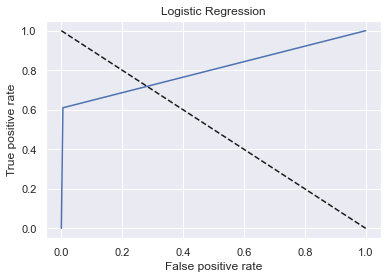

In [45]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [46]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988898736783678
Test accuracy is 0.9395053475935828
[[41589  1361]
 [ 1535  3387]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [47]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988451105202374
Test accuracy is 0.9551721256684492
[[42411   539]
 [ 1607  3315]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.67      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [48]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[14:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy is 0.9614052050600274
Test accuracy is 0.9526236631016043
[[42689   261]
 [ 2007  2915]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.92      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [49]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.951118631321677
Test accuracy is 0.9490307486631016
[[42553   397]
 [ 2043  2879]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.58      0.70      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.94     47872



In [50]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.922300110117369
Test accuracy is 0.9173629679144385
[[42809   141]
 [ 3815  1107]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.22      0.36      4922

    accuracy                           0.92     47872
   macro avg       0.90      0.61      0.66     47872
weighted avg       0.91      0.92      0.89     47872



In [51]:
# RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(RF, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9988540631518635
Test accuracy is 0.9554227941176471


KeyboardInterrupt: 

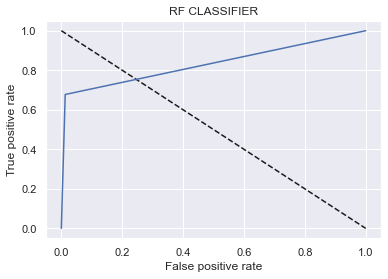

In [52]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

In [66]:
#!pip install eli5

In [53]:
import eli5
eli5.show_weights(LG,vec = tf_vec, top = 15)  #logistic Regression
# will give you top 15 features or words  which makes a comment toxic

Weight?,Feature
+16.065,fuck
+13.068,fucking
+11.703,idiot
+11.664,shit
+10.679,stupid
+9.407,asshole
+8.824,suck
+8.747,bullshit
+8.701,bitch
+7.538,dick


In [54]:
test_data =tf_vec.fit_transform(df_ts['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [55]:
prediction=LG.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [56]:
import joblib
joblib.dump(LG,"malig_comment.pkl")

['malig_comment.pkl']

In [57]:
prediction.shape

(153164,)

In [58]:
df1 = pd.DataFrame(prediction, columns =['Pred'])
print("\nPandas DataFrame: ")
df1


Pandas DataFrame: 


,Pred
0,0
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0


In [59]:
df_ts.shape

(153164, 2)

In [60]:
aa = pd.read_csv("test_m1.csv")  
#aa["Prediction"] = prediction  
aa.head()  

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [61]:
df2=aa.drop(['id'], axis = 1)

In [62]:
df2

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.
...,...
153159,". \n i totally agree, this stuff is nothing bu..."
153160,== Throw from out field to home plate. == \n\n...
153161,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,""" \n\n == """"One of the founding nations of the..."


In [63]:
# concat when axis = 1
pred=pd.concat([df2, df1], axis=1)
pred

,comment_text,Pred
0,Yo bitch Ja Rule is more succesful then you'll...,0
1,== From RfC == \n\n The title is fine as it is...,0
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0
3,":If you have a look back at the source, the in...",0
4,I don't anonymously edit articles at all.,0
...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",0
153160,== Throw from out field to home plate. == \n\n...,0
153161,""" \n\n == Okinotorishima categories == \n\n I ...",0
153162,""" \n\n == """"One of the founding nations of the...",0


In [64]:
file_name = 'pred_malig_comment.csv'
pred.to_csv(file_name)
print('DataFrame is written to csv File successfully.')

DataFrame is written to csv File successfully.
